┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_qhmBEj2Dyn\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_0nAZCHOXKN\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_UDa5kJ6hSh\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ejYZYvEPUd\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    18404
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    17606

Total number of variables............................:     4804
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 4.12e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_qxeRKVQVwT\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


Maximum objective value ∫vP = 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_6ZUjgd8FOT\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


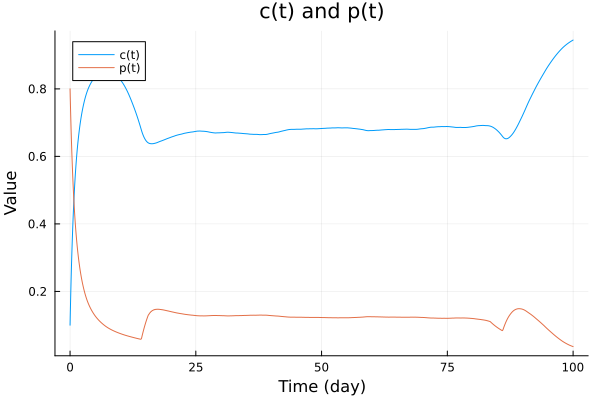

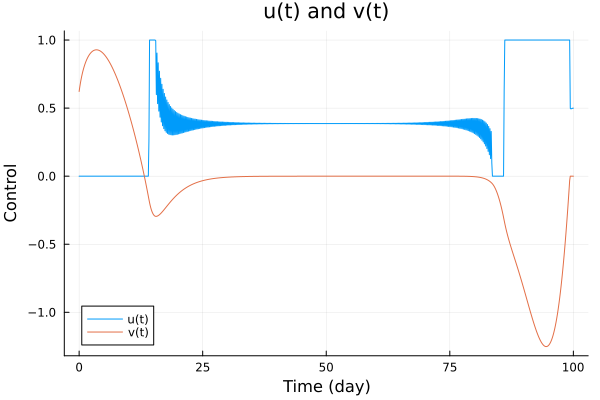

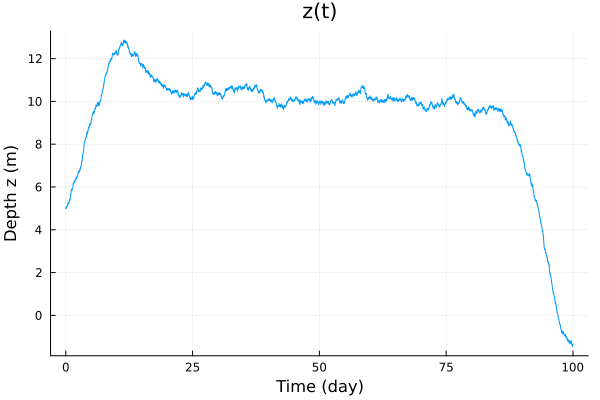

15.308024509076828


In [1]:
# Complete SDE Stochastic Algae Control Model with OptimalControl Inputs

using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP
using DifferentialEquations
using Random

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I0 = 300.0
α = 0.1
L = 50.0
kR_bar = 1.5
z_bar = 35.0
n = 1
σ = 0.2
tf = 100.0
ϵ =0.01
# ------------------ Biological Functions ------------------
function I_light(z)
    return I0 * exp(-α * z)
end

function vP(p, z)
    return kP * p * I_light(z) / (K + p * I_light(z))
end

function kR(z)
    return kR_bar * z^n / (z_bar^n + z^n)
end

# ------------------ OptimalControl Solution ------------------
ocp = @def begin
    t ∈ [0, tf], time
    x = (c, p, z) ∈ R^3, state
    U ∈ R^2, control
    c(0) == 0.1
    p(0) == 0.8
    z(0) == 5.0
    0 ≤ U(t)[1] ≤ 1
    -34 ≤ U(t)[2] ≤ 34
    0 ≤ c(t) ≤ 1
    0 ≤ p(t) ≤ 1
    0 ≤ z(t) ≤ L
    c(t) + p(t) ≤ 1
    ẋ(t) == [
        vP(p(t), z(t)) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
        U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t)) * p(t),
        U(t)[2]
    ]
    ∫(vP(p(t), z(t)) - ϵ * U(t)[2]^2) → max
end
sol1 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :midpoint, grid_size = 50, display = false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :midpoint, init = sol1, grid_size = 100, display = false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :midpoint, init = sol2, grid_size = 200, display = false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol3, grid_size = 300, display = false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol4, grid_size = 400, display = false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol5, grid_size = 500, display = false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol6, grid_size = 600, display = false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol7, grid_size = 700, display = false)
    sol_ocp  = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :midpoint, init = sol8, grid_size = 800, display = true)
println("Maximum objective value ∫vP = ", objective(sol_ocp))
U_fun = control(sol_ocp)
u_fun = t -> U_fun(t)[1]
v_fun = t -> U_fun(t)[2]

# ------------------ SDE Definition ------------------
function f!(du, u, p, t)
    c, p_, z = u
    u_ctrl = clamp(u_fun(t), 0.0, 1.0)
    v_ctrl = clamp(v_fun(t), -34.0, 34.0)
    du[1] = vP(p_, z) * (1 - c) - kR(z) * c * (1 - c - p_)
    du[2] = u_ctrl * kR(z) * c * (1 - c - p_) - vP(p_, z) * p_
    du[3] = v_ctrl
end

function g!(du, u, p, t)
    du[1] = 0.0
    du[2] = 0.0
    du[3] = σ
end

# ------------------ SDE Solution ------------------
u0 = [0.1, 0.8, 5.0]
prob = SDEProblem(f!, g!, u0, (0.0, tf))
sol_sde = solve(prob, EM(), dt=0.01)

# ------------------ Results Visualization ------------------
times = sol_sde.t
c_vals = sol_sde[1, :]
p_vals = sol_sde[2, :]
z_vals = sol_sde[3, :]
u_vals = [clamp(u_fun(t), 0.0, 1.0) for t in times]
v_vals = [clamp(v_fun(t), -34.0, 34.0) for t in times]

plt1 = plot(times, c_vals, xlabel="Time (day)", ylabel="Value", label="c(t)", title="c(t) and p(t)")
plot!(plt1, times, p_vals, label="p(t)")
display(plt1)

plt2 = plot(times, u_vals, xlabel="Time (day)", ylabel="Control", label="u(t)", title="u(t) and v(t)")
plot!(plt2, times, v_vals, label="v(t)")
display(plt2)

plt3 = plot(times, z_vals, xlabel="Time (day)", ylabel="Depth z (m)", title="z(t)", legend=false)
display(plt3)
